# Week 3 Exercise

In [1]:
knitr::opts_chunk$set(echo = FALSE)
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(ggthemes))
suppressPackageStartupMessages(library(repr))
cel <- suppressMessages(
    drop_na(read_csv("../assignment_1/cel_volden_wiseman_coursera.csv"))
)

Following the directions on the Coursera assignment page, you will make four
original visualizations.

### Put your name here: Marcio Woitek

## Exercise 1

**Explain what you are visualizing here:**

For this exercise, I'll use the CEL data. Specifically, I'll utilize some
data related to the 114th Congress. For this Congress, I want to answer the
following question: how are the members distributed according to gender? Then
I'm going to create a bar plot that shows the number of men and the number of
women in the 114th Congress. The numbers corresponding to Democrats and
Republicans will be presented separately.

**Put your figure here:**

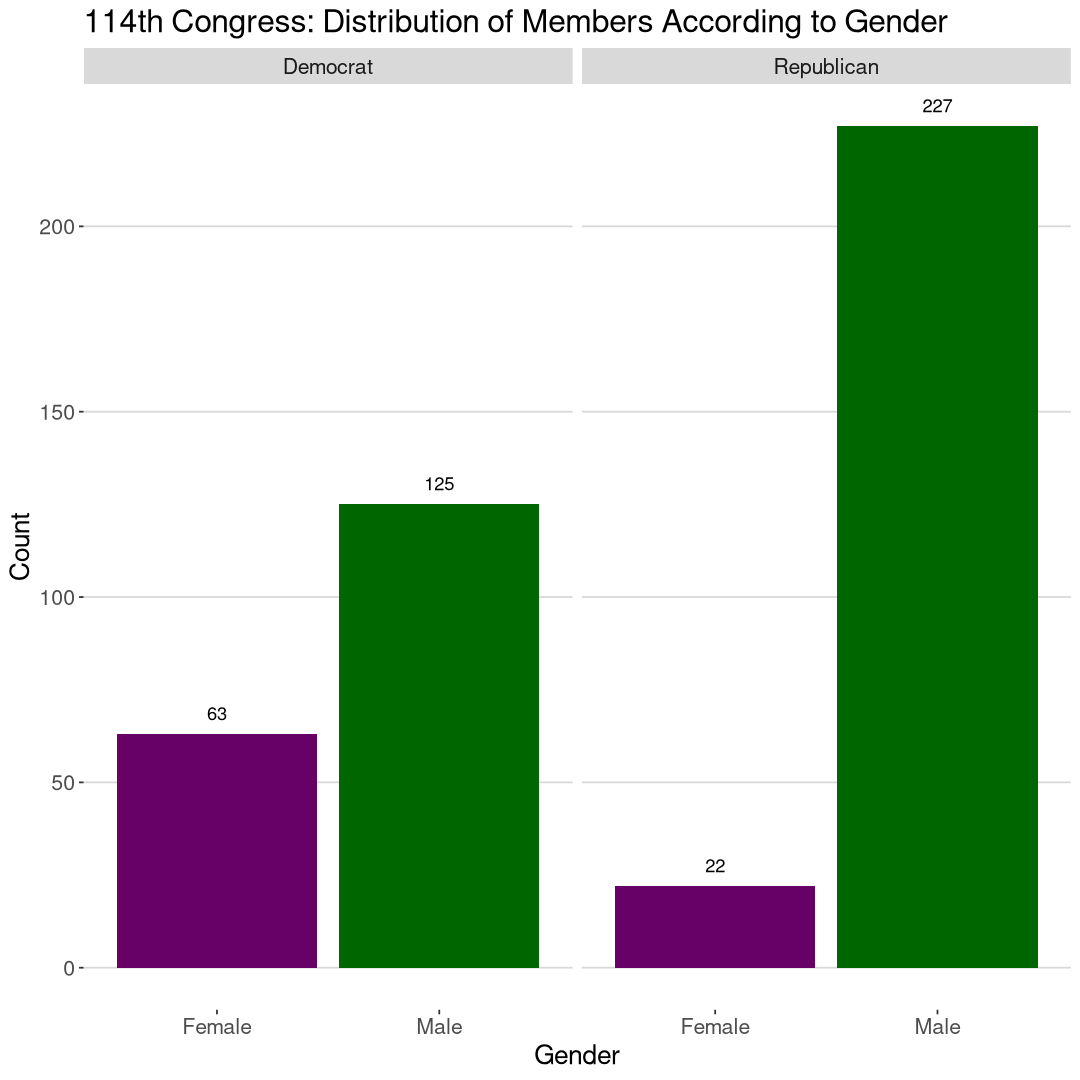

In [2]:
# Get only the data corresponding to the 114th Congress.
# Select only the `dem` and `female` columns.
data_plot_1 <- cel %>%
    filter(congress == 114) %>%
    select(dem, female)

# Recode the `dem` variable, and rename it as `Party`:
data_plot_1$dem <- recode(
    data_plot_1$dem,
    `0` = "Republican",
    `1` = "Democrat"
)
data_plot_1 <- rename(data_plot_1, Party = dem)

# Recode the `female` variable, and rename it as `Gender`:
data_plot_1$female <- recode(
    data_plot_1$female,
    `0` = "Male",
    `1` = "Female"
)
data_plot_1 <- rename(data_plot_1, Gender = female)

# Plot the figure:
options(repr.plot.height = 9, repr.plot.width = 9)
ggplot(data_plot_1, aes(x = Gender, fill = Gender)) +
    geom_bar() +
    geom_text(stat = "count", aes(label = ..count.., vjust = -1)) +
    labs(
        x = "Gender",
        y = "Count",
        title = "114th Congress: Distribution of Members According to Gender"
    ) +
    theme_hc(base_size = 16) +
    scale_fill_manual(
        values = c("Male" = "#006700", "Female" = "#670067")
    ) +
    facet_wrap(vars(Party)) +
    guides(fill = FALSE)

## Exercise 2

**Explain what you are visualizing here:**

Once again, I'm using the CEL data. This time I'll visualize the change in the
ideology of the members of Congress (as measured by the DW-Nominate score) over
a time period of 20 years. To do so, I'm going to consider only the data
associated with the last 10 Congresses included in the dataset. For each party,
I'll create a set of box plots. The i-th box will show the distribution of the
`dwnom1` variable corresponding to the i-th Congress.

**Put your figure here:**

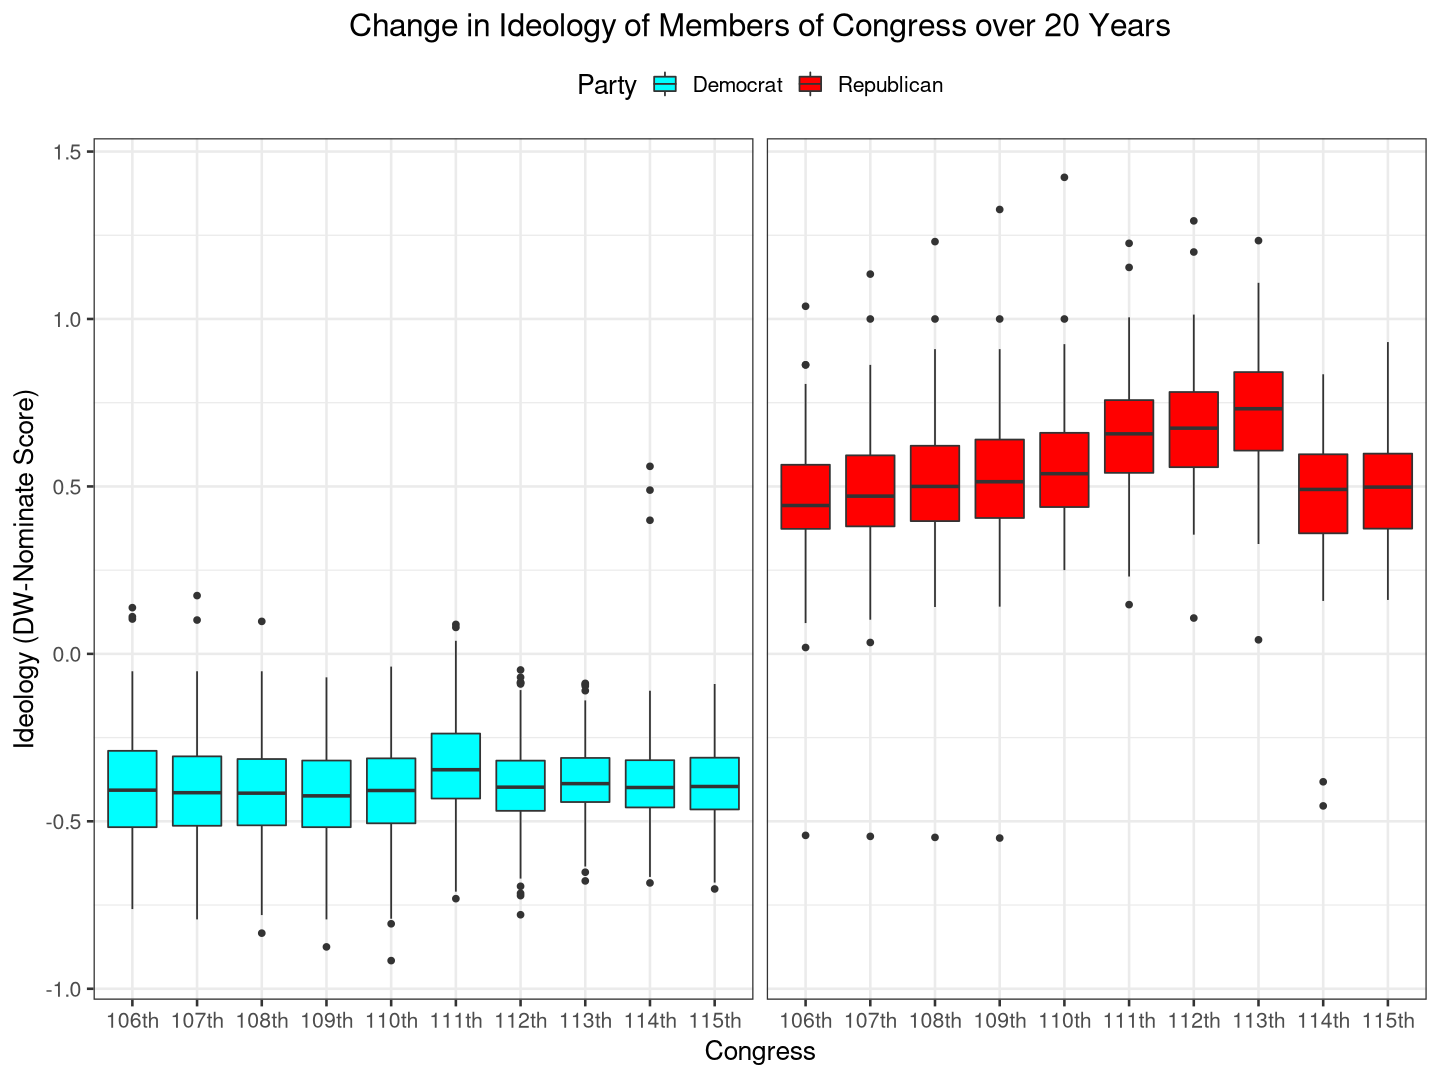

In [3]:
# Get only the data corresponding to the last 10 Congresses.
# Select only the `congress`, `dwnom1` and `dem` columns.
data_plot_2 <- cel %>%
    filter(congress > 105) %>%
    select(congress, dwnom1, dem)

# Recode the `congress` variable:
data_plot_2$congress <- recode(
    data_plot_2$congress,
    `106` = "106th",
    `107` = "107th",
    `108` = "108th",
    `109` = "109th",
    `110` = "110th",
    `111` = "111th",
    `112` = "112th",
    `113` = "113th",
    `114` = "114th",
    `115` = "115th"
)

# Recode the `dem` variable, and rename it as `Party`:
data_plot_2$dem <- recode(
    data_plot_2$dem,
    `0` = "Republican",
    `1` = "Democrat"
)
data_plot_2 <- rename(data_plot_2, Party = dem)

# Plot the figure:
options(repr.plot.height = 9, repr.plot.width = 12)
ggplot(data_plot_2, aes(x = congress, y = dwnom1, fill = Party)) +
    geom_boxplot() +
    labs(
        x = "Congress",
        y = "Ideology (DW-Nominate Score)",
        title = "Change in Ideology of Members of Congress over 20 Years"
    ) +
    facet_wrap(vars(Party)) +
    theme_bw(base_size = 16) +
    theme(
        legend.direction = "horizontal",
        legend.position = "top",
        plot.title = element_text(hjust = 0.5),
        strip.background = element_blank(),
        strip.text = element_blank()
    ) +
    scale_fill_manual(
        values = c("Democrat" = "#00FFFF", "Republican" = "#FF0000")
    )

## Exercise 3

**Explain what you are visualizing here:**

**Put your figure here:**

## Exercise 4

**Explain what you are visualizing here:**

**Put your figure here:**